# VOC FasterRCNN

In [1]:
from mantisshrimp import *
from mantisshrimp.imports import *
from mantisshrimp.engines.fastai import *
from mantisshrimp.hub.voc import *
import albumentations as A

/home/lgvaz/anaconda3/envs/light2/lib/python3.7/site-packages/graphql/type/directives.py:55: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  assert isinstance(locations, collections.Iterable), 'Must provide locations for directive.'
/home/lgvaz/anaconda3/envs/light2/lib/python3.7/site-packages/trains/backend_interface/metrics/events.py:27: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.attrs(cmp=False, slots=True)


In [2]:
source = get_voc_data()

In [3]:
parser = VOCAnnotationParser(
    annotations_dir=source / "Annotations",
    images_dir=source / "JPEGImages",
    categories=VOC_CATEGORIES,
)

In [4]:
splitter = RandomSplitter([0.8, 0.2])
train_records, valid_records = parser.parse(splitter)

In [5]:
train_transforms = AlbuTransform([A.HorizontalFlip()])

In [6]:
train_ds = Dataset(train_records, train_transforms)
valid_ds = Dataset(valid_records)

In [7]:
model = MantisFasterRCNN(num_classes=len(VOC_CATEGORIES))

In [8]:
def get_dataloader(model, dataset):
    return model.dataloader(dataset, batch_size=2, num_workers=8)

train_dl = get_dataloader(model, train_ds)
valid_dl = get_dataloader(model, valid_ds)

In [9]:
metrics = [COCOMetric(train_records, bbox=True, mask=False)]


creating index...
index created!


In [11]:
opt_func = fastai.ranger

In [12]:
learn = rcnn_learner(dls=[train_dl, valid_dl], model=model, metrics=metrics, opt_func=opt_func)

/home/lgvaz/git/fastai2/fastai2/callback/core.py:29: UserWarning: You are setting an attribute (loss) that also exists in the learner. Please be advised that you're not setting it in the learner but in the callback. Use `self.learn.loss` if you would like to change it in the learner.
  warn(f"You are setting an attribute ({name}) that also exists in the learner. Please be advised that you're not setting it in the learner but in the callback. Use `self.learn.{name}` if you would like to change it in the learner.")


/home/lgvaz/anaconda3/envs/light2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/conda-bld/pytorch_1587428398394/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


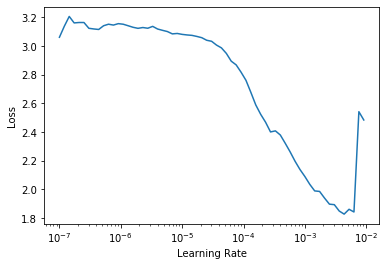

In [13]:
learn.lr_find(show_plot=False)
learn.recorder.plot_lr_find(skip_end=1)

In [ ]:
learn.fine_tune(3, 1e-3)

epoch,train_loss,valid_loss,COCOMetric,time


/home/lgvaz/anaconda3/envs/light2/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
